<a href="https://colab.research.google.com/github/tran-dung-nhi-123/streamlit-cloud/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_Test_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from imutils import paths

In [ ]:
from imutils import paths

imgTest = list(paths.list_images("/content/drive/MyDrive/AI/DATA/test"))

In [ ]:
X_test = []
y_test = []

In [ ]:
for path_test in imgTest:
    Y_test = path_test.split(os.path.sep)[-2]

    # Xu ly anh
    img1 = cv2.imread(path_test, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh ở định dạng xám

    if img1 is None:
        print("Lỗi: Không thể đọc hình ảnh từ đường dẫn:", path_test)
        continue

    img1 = cv2.resize(img1, (150, 150))  # Resize ảnh xám

    # Thêm vào dữ liệu data và label
    X_test.append(img1)
    y_test.append(Y_test)

In [ ]:
lb = LabelBinarizer()
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = lb.fit_transform(y_test)
X_test = X_test.astype('float32') / 255

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/AI/CNN_GRAY.h5')

In [ ]:
y_pred = loaded_model.predict(X_test)

17/17 [==============================] - 4s 192ms/step


In [ ]:
y_pred

array([[1.8345370e-08, 9.9999994e-01],
       [1.6332501e-11, 9.9999994e-01],
       [3.6415676e-10, 9.9999994e-01],
       ...,
       [9.9887335e-01, 1.1265255e-03],
       [9.9999553e-01, 4.4595154e-06],
       [9.9999923e-01, 7.7012692e-07]], dtype=float32)

In [ ]:
max_indices = np.argmax(y_pred, axis=1)

In [ ]:
y_pred_new = np.zeros_like(max_indices)
y_pred_new[max_indices == 1] = 1
y_pred_new[max_indices == 2] = 2

In [ ]:
y_pred_new

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
y_test_new = np.array(y_test).reshape(-1)

# In kết quả
print(y_test_new)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

##**KIỂM THỬ HÌNH ẢNH CỤ THỂ**

In [ ]:
labels = ['Bình thường', 'Viêm phổi']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2

# Đường dẫn tới tệp ảnh JPEG
img_path = '/content/drive/MyDrive/AI/DATA/test/PNEUMONIA/person1952_bacteria_4883.jpeg'

# Đọc ảnh từ đường dẫn
img = cv2.imread(img_path)

# Kiểm tra xem ảnh có được đọc thành công không
if img is None:
    print(f"Không thể đọc được ảnh từ đường dẫn: {img_path}")
else:
    print(f"Đã đọc thành công ảnh từ đường dẫn: {img_path}")


Đã đọc thành công ảnh từ đường dẫn: /content/drive/MyDrive/AI/DATA/test/PNEUMONIA/person1952_bacteria_4883.jpeg


1/1 [==============================] - 0s 107ms/step
[[4.0666976e-09 1.0000000e+00]]
- Bình thường:  0.0 %
- Viêm phổi:  100.0 %
--> Nhãn dự đoán:  Viêm phổi


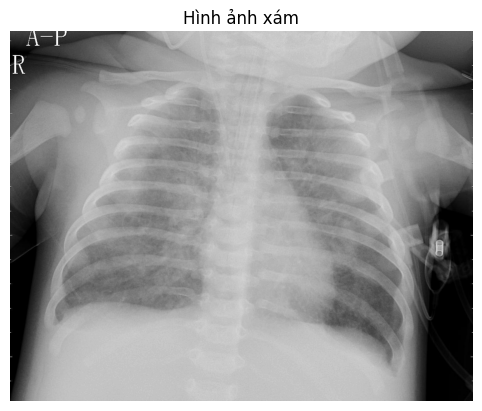

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
img = cv2.imread('/content/drive/MyDrive/AI/DATA/test/PNEUMONIA/person1952_bacteria_4883.jpeg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Đổi kích thước ảnh xám về 150x150
img_resize = cv2.resize(img_gray, (150, 150))

# Thêm một chiều để khớp với đầu vào của mô hình và chuẩn hóa giá trị pixel về khoảng [0, 1]
img_resize = img_resize / 255.0
img_resize = np.expand_dims(img_resize, axis=-1)  # Thêm chiều kênh
img_resize = np.expand_dims(img_resize, axis=0)  # Thêm chiều batch

# Tải mô hình đã huấn luyện (thay 'loaded_model' bằng tên mô hình của bạn)
model_path = "/content/drive/MyDrive/AI/CNN_GRAY.h5"
loaded_model = tf.keras.models.load_model(model_path)

# Dự đoán
yhat = loaded_model.predict(img_resize)
max_index = np.argmax(yhat)
labels = ['Bình thường', 'Viêm phổi']  # Đảm bảo rằng các nhãn được định nghĩa trước

# In kết quả
print(yhat)
print('- Bình thường: ', round(yhat[0][0]*100,2), "%")
print('- Viêm phổi: ', round(yhat[0][1]*100,2), "%")
print("--> Nhãn dự đoán: ", labels[max_index])

# Hiển thị hình ảnh xám
plt.imshow(img_gray, cmap='gray')
plt.title("Hình ảnh xám")
plt.axis('off')
plt.show()


##**MA TRẬN NHẦM LẪN**

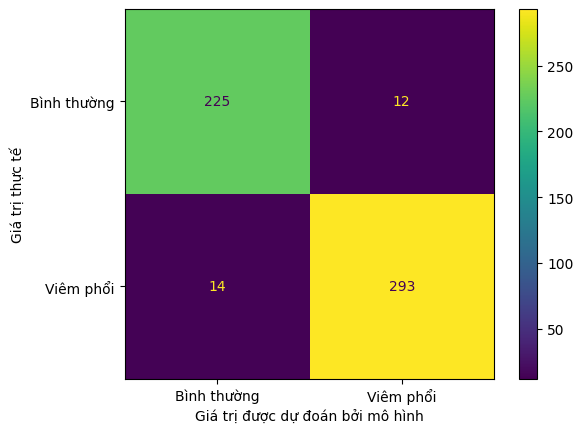

In [ ]:
# Ma trận nhầm lẫn dạng đồ thị
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
matran = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_new, y_pred_new), display_labels = ['Bình thường', 'Viêm phổi'])
matran.plot()
plt.xlabel('Giá trị được dự đoán bởi mô hình')
plt.ylabel('Giá trị thực tế')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# Tính và hiển thị classification report
report = classification_report(y_test_new, y_pred_new, target_names=['Bình thường', 'Viêm phổi'], output_dict=True)
print("Classification Report:\n", classification_report(y_test_new, y_pred_new, target_names=['Bình thường', 'Viêm phổi']))

# Lấy macro-averaged F1-score
macro_f1 = report['macro avg']['f1-score']
print("Macro-averaged F1-score:", macro_f1)


Classification Report:
               precision    recall  f1-score   support

 Bình thường       0.94      0.95      0.95       237
   Viêm phổi       0.96      0.95      0.96       307

    accuracy                           0.95       544
   macro avg       0.95      0.95      0.95       544
weighted avg       0.95      0.95      0.95       544

Macro-averaged F1-score: 0.9514472455648926


In [ ]:
# Lấy các chỉ số Precision, Recall, và F1-score cho từng lớp
precision_normal = report['Bình thường']['precision']
recall_normal = report['Bình thường']['recall']
f1_normal = report['Bình thường']['f1-score']

precision_pneumonia = report['Viêm phổi']['precision']
recall_pneumonia = report['Viêm phổi']['recall']
f1_pneumonia = report['Viêm phổi']['f1-score']

# Lấy macro-averaged Precision, Recall, và F1-score
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']

# In ra các chỉ số
print("Chỉ số Precision, Recall, và F1-score cho từng lớp:")
print(f"Bình thường: Precision={precision_normal}, Recall={recall_normal}, F1-score={f1_normal}")
print(f"Viêm phổi: Precision={precision_pneumonia}, Recall={recall_pneumonia}, F1-score={f1_pneumonia}")

print("\nChỉ số macro-averaged Precision, Recall, và F1-score:")
print(f"Macro-averaged Precision={macro_precision}")
print(f"Macro-averaged Recall={macro_recall}")
print(f"Macro-averaged F1-score={macro_f1}")

Chỉ số Precision, Recall, và F1-score cho từng lớp:
Bình thường: Precision=0.9414225941422594, Recall=0.9493670886075949, F1-score=0.9453781512605042
Viêm phổi: Precision=0.9606557377049181, Recall=0.9543973941368078, F1-score=0.9575163398692811

Chỉ số macro-averaged Precision, Recall, và F1-score:
Macro-averaged Precision=0.9510391659235887
Macro-averaged Recall=0.9518822413722013
Macro-averaged F1-score=0.9514472455648926
